In [49]:
import pandas as pd
import random

In [50]:
random.seed(a=None, version=2)

In [51]:
from google.colab import files
uploaded = files.upload()

Saving Delhi Housing - Delhi.csv to Delhi Housing - Delhi.csv


In [54]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Delhi Housing - Delhi.csv']))
# Dataset is now stored in a Pandas Dataframe

In [56]:
dataset = df.values

In [57]:
dataset

array([[    1200,        2,        1, ...,        1,        1, 10500000],
       [    1000,        3,        0, ...,        0,        0,  6000000],
       [    1350,        2,        1, ...,        0,        0, 15000000],
       ...,
       [     415,        1,        1, ...,        9,        9,  2600000],
       [     415,        1,        1, ...,        9,        9,  5500000],
       [     900,        3,        1, ...,        9,        9,  4200000]])

In [59]:
df.isnull()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,Price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)


[[6.32911392e-02 1.42857143e-01 1.00000000e+00 ... 1.11111111e-01
  1.11111111e-01 9.96950506e-03]
 [5.06329114e-02 2.85714286e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.69153179e-03]
 [7.27848101e-02 1.42857143e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.52474783e-02]
 ...
 [1.36075949e-02 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 7.03729769e-04]
 [1.36075949e-02 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 4.10509032e-03]
 [4.43037975e-02 2.85714286e-01 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 2.58034248e-03]]


In [62]:
X = scaled_data[:,0:29]
Y = scaled_data[:,29]

In [63]:
X

array([[0.06329114, 0.14285714, 1.        , ..., 0.        , 0.11111111,
        0.11111111],
       [0.05063291, 0.28571429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07278481, 0.14285714, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01360759, 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.01360759, 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.0443038 , 0.28571429, 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [64]:
Y

array([0.00996951, 0.00469153, 0.01524748, ..., 0.00070373, 0.00410509,
       0.00258034])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5)

In [68]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(3498, 29) (750, 29) (750, 29) (3498,) (750,) (750,)


In [74]:
from keras.models import Sequential
from keras.layers import Dense

In [78]:
model = Sequential([
    Dense(32, activation='tanh', input_shape=(29, )),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid'),
])

In [79]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [80]:
import numpy as np
hist = model.fit(X_train, np.array(Y_train), batch_size=32, epochs=100, validation_data=(X_val, np.array(Y_val)))


Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.0129 - val_loss: 0.0512 - val_accuracy: 0.0107
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.0129 - val_loss: 0.0304 - val_accuracy: 0.0107
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.0129 - val_loss: 0.0208 - val_accuracy: 0.0107
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.0129 - val_loss: 0.0155 - val_accuracy: 0.0107
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.0129 - val_loss: 0.0123 - val_accuracy: 0.0107
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.0129 - val_loss: 0.0101 - val_accuracy: 0.0107
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.0129 - val_loss: 0.0086 - val_accuracy: 0.0107

In [81]:
model.evaluate(X_test, Y_test)[1]

24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0080    


0.00800000037997961

In [82]:
import matplotlib.pyplot as plt

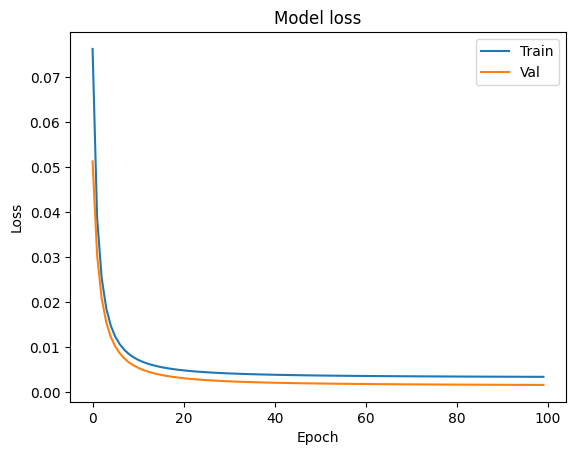

In [83]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [84]:
from keras.layers import Dropout
from keras import regularizers

In [87]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(29,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=50, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
70/70 [==============================] - 6s 70ms/step - loss: 7.2003 - accuracy: 0.0129 - val_loss: 0.2167 - val_accuracy: 0.0107
Epoch 2/100
70/70 [==============================] - 5s 71ms/step - loss: 0.1407 - accuracy: 0.0129 - val_loss: 0.1034 - val_accuracy: 0.0107
Epoch 3/100
70/70 [==============================] - 7s 95ms/step - loss: 0.1111 - accuracy: 0.0129 - val_loss: 0.0984 - val_accuracy: 0.0107
Epoch 4/100
70/70 [==============================] - 4s 62ms/step - loss: 0.1049 - accuracy: 0.0129 - val_loss: 0.0901 - val_accuracy: 0.0107
Epoch 5/100
70/70 [==============================] - 6s 80ms/step - loss: 0.1025 - accuracy: 0.0129 - val_loss: 0.0878 - val_accuracy: 0.0107
Epoch 6/100
70/70 [==============================] - 5s 64ms/step - loss: 0.0990 - accuracy: 0.0129 - val_loss: 0.0845 - val_accuracy: 0.0107
Epoch 7/100
70/70 [==============================] - 5s 76ms/step - loss: 0.0966 - accuracy: 0.0129 - val_loss: 0.0821 - val_accuracy: 0.0107
Epoch 

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [46]:

def unscale_data(scaled_data, min_val, max_val):
    unscaled_data = scaled_data * (max_val - min_val) + min_val
    return unscaled_data

In [ ]:

# Rescale the predicted and actual efficiency
min_efficiency = scaler.data_min_[-1]
max_efficiency = scaler.data_max_[-1]

unscaled_Y_pred = unscale_data(model.predict(X_test), min_efficiency, max_efficiency)
unscaled_Y_test = unscale_data(Y_test.reshape(-1, 1), min_efficiency, max_efficiency)



15/15 [==============================] - 0s 2ms/step


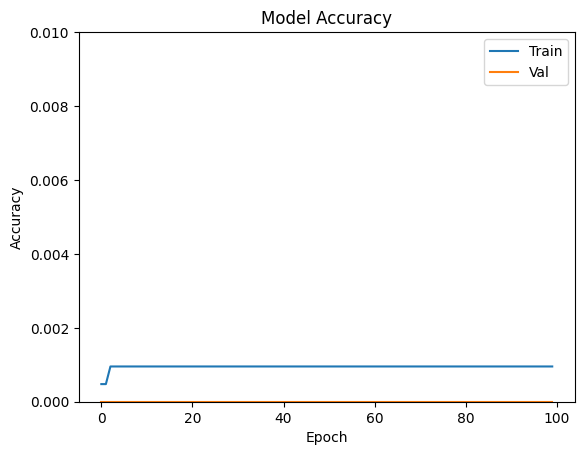

In [ ]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=0.01, bottom=0)
plt.show()

In [ ]:
# Calculate mean absolute percentage error
mape = np.mean(abs((unscaled_Y_pred - unscaled_Y_test) / unscaled_Y_test) * 100)

print("Mean Absolute Percentage Error: {:.2f}%".format(mape))


Mean Absolute Percentage Error: 1.03%
